In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
games_df = pd.read_csv('C:/Users/sieji/Data Science projects/NBA games data/NBA games data/games.csv')
games_details_df = pd.read_csv('C:/Users/sieji/Data Science projects/NBA games data/NBA games data/games_details.csv', low_memory=False)
players_df = pd.read_csv('C:/Users/sieji/Data Science projects/NBA games data/NBA games data/players.csv')
ranking_df = pd.read_csv('C:/Users/sieji/Data Science projects/NBA games data/NBA games data/ranking.csv')
teams_df = pd.read_csv('C:/Users/sieji/Data Science projects/NBA games data/NBA games data/teams.csv')

In [25]:
players_df.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [26]:
teams_df.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [27]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [28]:
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


In [29]:
##Dropping duplicate of game
games_details_df = games_details_df.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])

In [30]:
giannis = games_details_df[games_details_df['PLAYER_NAME'] == 'Giannis Antetokounmpo']
## I want to analyse Giannis' season for 2020-2021

In [31]:
giannis.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
72,22101008,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,Giannis,F,NaN,34:01,...,1.0,7.0,8.0,3.0,0.0,1.0,1.0,2.0,31.0,-26.0
555,22100984,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,Giannis,F,NaN,37:03,...,3.0,9.0,12.0,5.0,1.0,0.0,2.0,4.0,43.0,3.0
859,22100979,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,Giannis,F,NaN,27:46,...,1.0,6.0,7.0,7.0,3.0,1.0,1.0,3.0,39.0,18.0
1144,22100961,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,Giannis,F,NaN,31:13,...,3.0,10.0,13.0,6.0,1.0,3.0,3.0,6.0,19.0,-8.0
1556,22100949,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,Giannis,F,NaN,38:48,...,4.0,12.0,16.0,5.0,2.0,1.0,4.0,4.0,34.0,15.0


In [32]:
giannis.drop(["TEAM_ID", "TEAM_CITY","PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)


c:\users\sieji\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
giannis.head()

,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
72,22101008,MIL,Giannis,F,34:01,9.0,17.0,0.529,1.0,4.0,...,1.0,7.0,8.0,3.0,0.0,1.0,1.0,2.0,31.0,-26.0
555,22100984,MIL,Giannis,F,37:03,15.0,22.0,0.682,1.0,5.0,...,3.0,9.0,12.0,5.0,1.0,0.0,2.0,4.0,43.0,3.0
859,22100979,MIL,Giannis,F,27:46,13.0,19.0,0.684,4.0,4.0,...,1.0,6.0,7.0,7.0,3.0,1.0,1.0,3.0,39.0,18.0
1144,22100961,MIL,Giannis,F,31:13,8.0,13.0,0.615,0.0,1.0,...,3.0,10.0,13.0,6.0,1.0,3.0,3.0,6.0,19.0,-8.0
1556,22100949,MIL,Giannis,F,38:48,12.0,22.0,0.545,0.0,2.0,...,4.0,12.0,16.0,5.0,2.0,1.0,4.0,4.0,34.0,15.0


In [35]:
games_date = games_df[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
games_date.head()

,GAME_DATE_EST,GAME_ID,SEASON
0,2022-03-12,22101005,2021
1,2022-03-12,22101006,2021
2,2022-03-12,22101007,2021
3,2022-03-12,22101008,2021
4,2022-03-12,22101009,2021


In [36]:
giannis_stats = giannis.merge(games_date, on="GAME_ID", how="left")

In [38]:
season_stats = giannis_stats.groupby("SEASON").sum()/giannis_stats.groupby("SEASON").count()

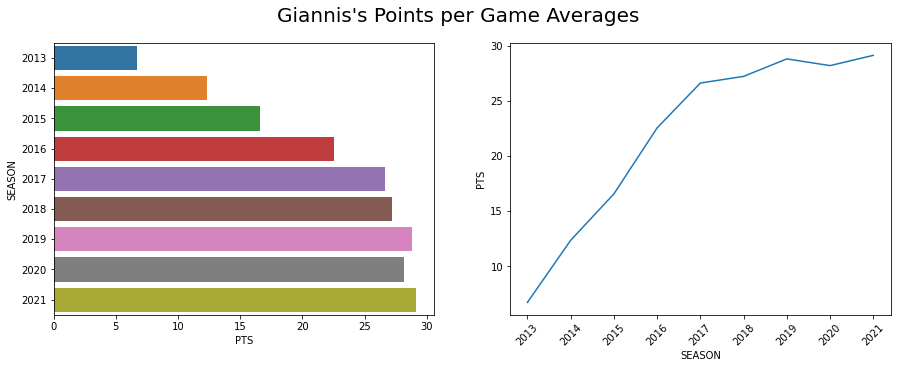

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Giannis's Points per Game Averages", fontsize=20)
sns.barplot(x=season_stats["PTS"], y = season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=season_stats["PTS"], x = season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [41]:
season_stats.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,NICKNAME,OREB,PF,PLUS_MINUS,PTS,REB,START_POSITION,STL,TEAM_ABBREVIATION,TO
SEASON,,,,,,,,,,,,,,,,,,,,,
2013,1.879518,0.855422,3.433735,1.493976,0.506024,0.233530,5.313253,2.180723,0.396325,2.698795,...,NaN,0.975904,2.277108,-2.324675,6.734940,4.409639,NaN,0.795181,NaN,1.650602
2014,2.510638,1.095745,5.425532,0.606383,0.074468,0.051415,9.617021,4.553191,0.471255,4.234043,...,NaN,1.244681,3.159574,-0.595745,12.361702,6.670213,NaN,0.872340,NaN,2.148936
2015,4.105882,1.411765,6.105882,1.364706,0.364706,0.177424,12.400000,6.258824,0.497035,5.094118,...,NaN,1.423529,3.211765,-1.870588,16.564706,7.529412,NaN,1.164706,NaN,2.576471
2016,5.228261,1.804348,6.847826,2.152174,0.597826,0.228978,15.565217,8.130435,0.514163,7.576087,...,NaN,1.706522,3.065217,0.391304,22.543478,8.554348,NaN,1.608696,NaN,2.967391
2017,4.916667,1.392857,7.904762,1.869048,0.571429,0.225571,18.416667,9.809524,0.531810,8.500000,...,NaN,1.976190,3.130952,1.738095,26.607143,9.880952,NaN,1.440476,NaN,2.904762


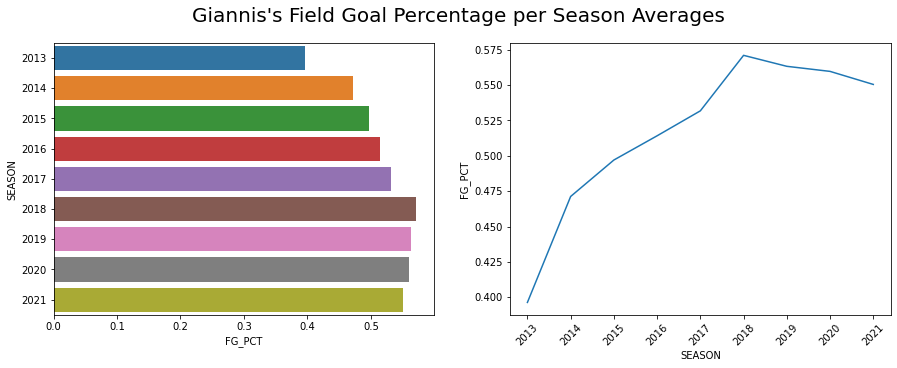

In [42]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Giannis's Field Goal Percentage per Season Averages", fontsize=20)
sns.barplot(x=season_stats["FG_PCT"], y = season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=season_stats["FG_PCT"], x = season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [43]:
#Comparing to his two other stars, Jrue and Middleton:
##Middleton first
middleton = games_details_df[games_details_df['PLAYER_NAME'] == 'Khris Middleton']
middleton.drop(["TEAM_ID", "TEAM_CITY","PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)


c:\users\sieji\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
middleton.head()

,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
71,22101008,MIL,Khris,F,35:18,6.0,19.0,0.316,4.0,9.0,...,2.0,2.0,4.0,6.0,3.0,0.0,1.0,3.0,18.0,-13.0
554,22100984,MIL,Khris,F,36:04,9.0,17.0,0.529,2.0,6.0,...,0.0,3.0,3.0,8.0,0.0,0.0,1.0,1.0,23.0,5.0
858,22100979,MIL,Khris,F,29:38,9.0,17.0,0.529,4.0,7.0,...,0.0,2.0,2.0,9.0,0.0,0.0,1.0,2.0,25.0,24.0
1143,22100961,MIL,Khris,F,35:52,16.0,27.0,0.593,5.0,9.0,...,0.0,8.0,8.0,5.0,1.0,0.0,3.0,2.0,44.0,21.0
1555,22100949,MIL,Khris,F,38:46,9.0,15.0,0.600,1.0,4.0,...,1.0,5.0,6.0,7.0,0.0,0.0,6.0,4.0,22.0,10.0


In [51]:
middleton_stats = middleton.merge(games_date, on="GAME_ID", how="left")
middleton_season_stats = middleton_stats.groupby("SEASON").sum()/middleton_stats.groupby("SEASON").count()
middleton_season_stats.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,NICKNAME,OREB,PF,PLUS_MINUS,PTS,REB,START_POSITION,STL,TEAM_ABBREVIATION,TO
SEASON,,,,,,,,,,,,,,,,,,,,,
2012,1.032258,0.129032,1.709677,1.806452,0.645161,0.246774,5.129032,2.258065,0.419290,1.161290,...,NaN,0.193548,1.935484,0.962963,6.096774,1.903226,NaN,0.580645,NaN,0.354839
2013,2.011364,0.227273,3.000000,3.397727,1.386364,0.346682,10.204545,4.443182,0.428614,1.636364,...,NaN,0.715909,2.920455,-4.658537,11.681818,3.715909,NaN,1.011364,NaN,1.500000
2014,2.219780,0.186813,3.626374,3.538462,1.417582,0.385516,11.230769,5.153846,0.458659,1.956044,...,NaN,0.659341,2.406593,2.406593,13.406593,4.285714,NaN,1.549451,NaN,1.428571
2015,3.964706,0.247059,3.223529,4.423529,1.729412,0.359988,14.058824,6.305882,0.444047,3.811765,...,NaN,0.517647,2.670588,-0.223529,17.729412,3.741176,NaN,1.564706,NaN,2.211765
2016,3.742857,0.200000,4.000000,3.514286,1.485714,0.409857,11.742857,5.171429,0.434400,3.257143,...,NaN,0.314286,2.742857,2.942857,14.657143,4.314286,NaN,1.514286,NaN,2.171429


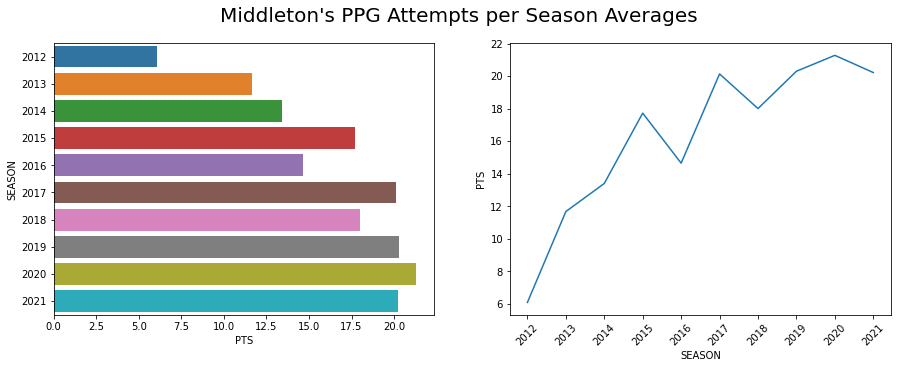

In [54]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Middleton's PPG Attempts per Season Averages", fontsize=20)
sns.barplot(x=middleton_season_stats["PTS"], y = middleton_season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=middleton_season_stats["PTS"], x = middleton_season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

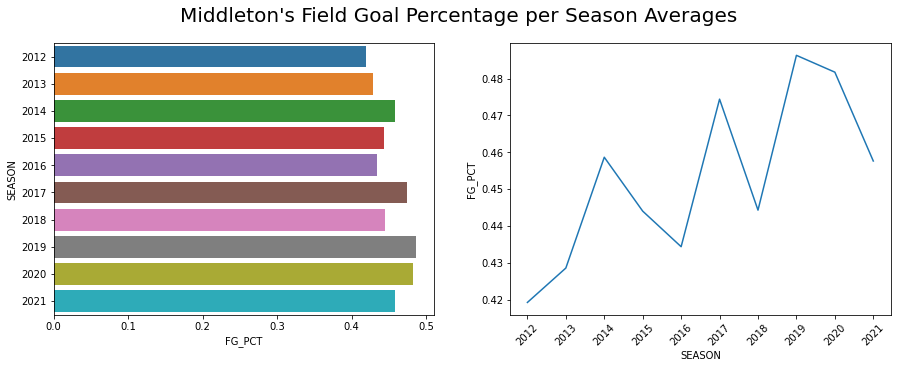

In [56]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Middleton's Field Goal Percentage per Season Averages", fontsize=20)
sns.barplot(x=middleton_season_stats["FG_PCT"], y = middleton_season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=middleton_season_stats["FG_PCT"], x = middleton_season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [46]:
#Comparing to his two other stars, Jrue and Middleton:
##Jrue now
holiday = games_details_df[games_details_df['PLAYER_NAME'] == 'Jrue Holiday']
holiday.drop(["TEAM_ID", "TEAM_CITY","PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)


c:\users\sieji\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
holiday.head()

,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
75,22101008,MIL,Jrue,G,33:18,5.0,11.0,0.455,2.0,5.0,...,0.0,1.0,1.0,7.0,2.0,0.0,2.0,1.0,13.0,-16.0
558,22100984,MIL,Jrue,G,34:49,5.0,17.0,0.294,1.0,4.0,...,2.0,3.0,5.0,8.0,2.0,0.0,4.0,5.0,11.0,7.0
862,22100979,MIL,Jrue,G,28:44,6.0,12.0,0.500,1.0,5.0,...,2.0,2.0,4.0,6.0,3.0,0.0,3.0,1.0,13.0,10.0
1147,22100961,MIL,Jrue,G,38:23,7.0,13.0,0.538,4.0,5.0,...,0.0,2.0,2.0,9.0,4.0,1.0,4.0,4.0,24.0,14.0
1559,22100949,MIL,Jrue,G,37:50,10.0,20.0,0.500,3.0,6.0,...,4.0,4.0,8.0,5.0,0.0,1.0,0.0,2.0,26.0,3.0


In [49]:
##seeing if jrue and middleton have had good years
holiday_stats = holiday.merge(games_date, on="GAME_ID", how="left")
holiday_season_stats = holiday_stats.groupby("SEASON").sum()/holiday_stats.groupby("SEASON").count()

In [50]:
holiday_season_stats.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,NICKNAME,OREB,PF,PLUS_MINUS,PTS,REB,START_POSITION,STL,TEAM_ABBREVIATION,TO
SEASON,,,,,,,,,,,,,,,,,,,,,
2009,3.700000,0.237500,1.812500,2.112500,0.837500,0.325612,6.912500,3.062500,0.423100,1.250000,...,NaN,0.750000,2.100000,-2.232877,7.912500,2.562500,NaN,1.037500,NaN,2.137500
2010,6.340426,0.340426,3.340426,2.829787,1.042553,0.312883,12.031915,5.308511,0.439096,2.617021,...,NaN,0.872340,2.489362,1.850575,13.797872,4.212766,NaN,1.510638,NaN,2.702128
2011,4.600000,0.325000,2.537500,2.837500,1.125000,0.347300,12.900000,5.575000,0.431187,2.150000,...,NaN,0.962500,2.062500,2.269231,14.012500,3.500000,NaN,1.562500,NaN,2.100000
2012,7.904762,0.392857,3.095238,3.154762,1.178571,0.344012,16.202381,6.988095,0.430107,3.011905,...,NaN,1.166667,2.238095,-1.628205,17.416667,4.261905,NaN,1.523810,NaN,3.619048
2013,7.547619,0.309524,3.166667,2.333333,0.952381,0.339214,12.785714,5.690476,0.442310,1.928571,...,NaN,0.761905,2.738095,0.705882,13.833333,3.928571,NaN,1.642857,NaN,3.380952


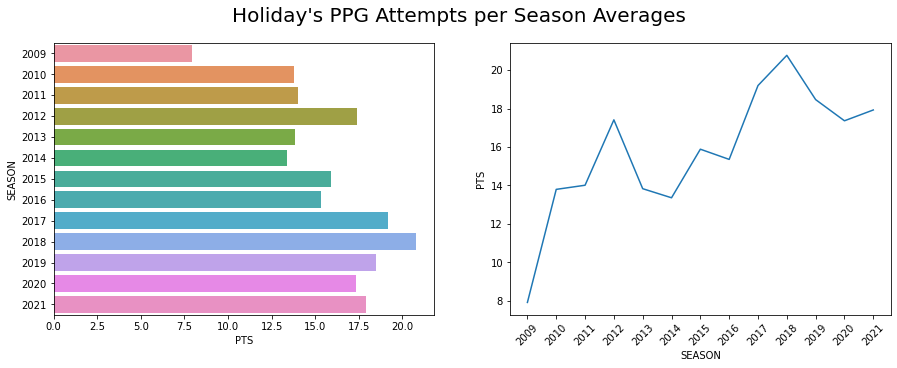

In [52]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Holiday's PPG per Season Averages", fontsize=20)
sns.barplot(x=holiday_season_stats["PTS"], y = holiday_season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=holiday_season_stats["PTS"], x = holiday_season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

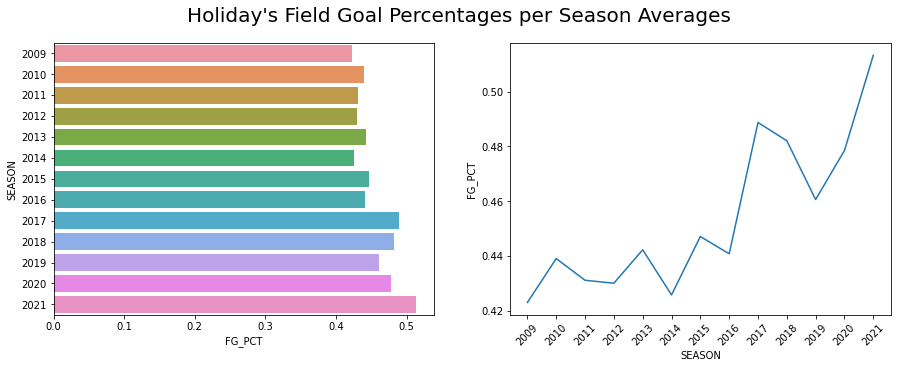

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Holiday's Field Goal Percentages per Season Averages", fontsize=20)
sns.barplot(x=holiday_season_stats["FG_PCT"], y = holiday_season_stats.index.map(str), ax=axes[0])
sns.lineplot(y=holiday_season_stats["FG_PCT"], x = holiday_season_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [ ]:
##As we can see, while his two other costars have had relatively quiet seasons, 
##with Middleton having a lower field goal efficiency and Holiday having a mild 18ppg
##on good efficiency, Giannis has steadily increased his ppg output
##while maintaining efficiency despite being the focal point of 
##sturdy NBA defenses night in and night out

In [67]:
##Now, we will attempt to compare Giannis to the rest of the league
all_other_players = games_details_df[["PLAYER_NAME","FGM","FG_PCT", "FG3_PCT", "PTS","FGA", "FG3M", "FG3A", "FTM", "FT_PCT"]]
all_other_players = all_other_players.groupby("PLAYER_NAME").sum()
all_other_players

,FGM,FG_PCT,FG3_PCT,PTS,FGA,FG3M,FG3A,FTM,FT_PCT
PLAYER_NAME,,,,,,,,,
A.J. Guyton,0.0,0.000,0.000,4.0,4.0,0.0,2.0,4.0,1.000
A.J. Lawson,2.0,0.667,1.000,8.0,3.0,2.0,2.0,2.0,1.000
AJ Hammons,34.0,8.924,3.833,82.0,76.0,5.0,12.0,9.0,3.750
AJ Price,655.0,103.594,77.867,1832.0,1686.0,267.0,805.0,255.0,96.154
Aamir Simms,1.0,1.000,0.000,4.0,2.0,0.0,0.0,2.0,1.000
Aaron Brooks,2573.0,281.766,228.418,7141.0,6230.0,920.0,2514.0,1075.0,341.487
Aaron Craft,5.0,1.583,1.000,12.0,10.0,2.0,5.0,0.0,0.000
Aaron Gordon,2747.0,254.561,159.766,7263.0,6053.0,622.0,1931.0,1147.0,298.059
Aaron Gray,499.0,145.530,0.000,1237.0,979.0,0.0,3.0,239.0,82.700


c:\users\sieji\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


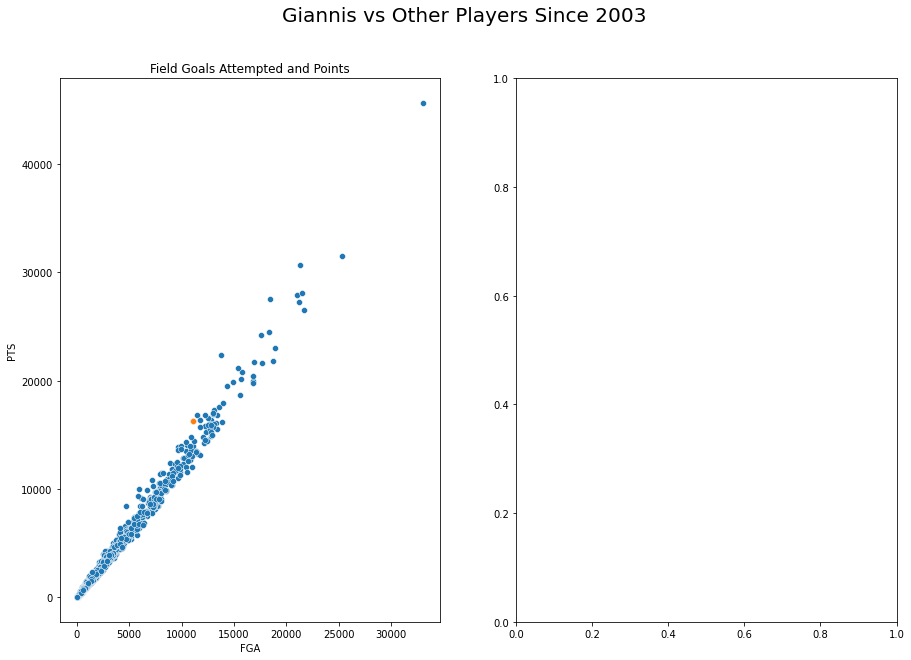

In [69]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
fig.suptitle("Giannis vs Other Players Since 2003", fontsize=20)

sns.scatterplot(all_other_players["FGA"], all_other_players["PTS"], ax = axes[0])
sns.scatterplot(x="FGA", y="PTS", data=all_other_players[all_other_players.index == 'Giannis Antetokounmpo'], ax=axes[0])
axes[0].title.set_text('Field Goals Attempted and Points')

sns.scatterplot(all_other_players["FGA"], all_other_players["PTS"], ax = axes[0])
sns.scatterplot(x="FGA", y="PTS", data=all_other_players[all_other_players.index == 'Giannis Antetokounmpo'], ax=axes[0])
axes[0].title.set_text('Field Goals Attempted and Points')

In [ ]:
##boo this is bad analysis